# HOUSE PRICE PREDICTION USING LINEAR REGRESSION MODEL


In [1]:
# import libraries
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
img=Image.open("banner.jpg")

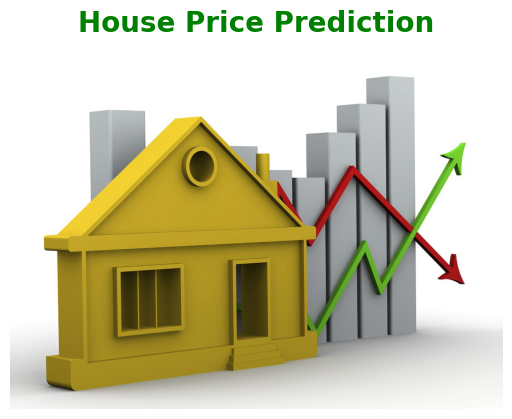

In [30]:

plt.imshow(img)
plt.axis("off")
plt.title("House Price Prediction",color="green",fontsize=20,fontweight="bold")
plt.show()

In [4]:
data=pd.read_csv("house_price.csv")

In [5]:
data

,Size,Bedrooms,Price
0,1500,3,400000
1,1600,3,425000
2,1700,2,450000
3,1650,2,420000
4,1580,3,400000
5,1800,3,500000
6,1930,3,530000
7,1590,2,380000
8,1750,2,400000


In [6]:
x=data[['Size','Bedrooms']] # independent input features
y=data['Price'] # dependent target variable

In [7]:
x

,Size,Bedrooms
0,1500,3
1,1600,3
2,1700,2
3,1650,2
4,1580,3
5,1800,3
6,1930,3
7,1590,2
8,1750,2


In [8]:
y

0    400000
1    425000
2    450000
3    420000
4    400000
5    500000
6    530000
7    380000
8    400000
Name: Price, dtype: int64

In [9]:
# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Check the model's parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: -176268.65671641775
Coefficients: [  313.43283582 33383.08457711]


In [21]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Compare actual vs predicted prices
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_results)


   Actual      Predicted
7  380000  388855.721393
1  425000  425373.134328


In [12]:
x_test

,Size,Bedrooms
7,1590,2
1,1600,3


In [13]:
model.fit(x,y)

LinearRegression()

In [14]:
model.coef_

array([  318.87946764, 35470.64505742])

In [26]:


# Create random test data (for example: 5 random houses)
# Random values: Size between 1000 to 3000 sq ft, Bedrooms between 1 to 5
random_sizes = np.random.randint(1000, 2000, size=5)
random_bedrooms = np.random.randint(2, 4, size=5)

# Combine into a DataFrame for easy manipulation
random_test_data = pd.DataFrame({
    'Size': random_sizes,
    'Bedrooms': random_bedrooms
})

print("Random Test Data:")
print(random_test_data)


Random Test Data:
   Size  Bedrooms
0  1311         2
1  1598         2
2  1657         3
3  1739         2
4  1470         2


In [27]:
random_predictions=model.predict(random_test_data)

In [28]:
results = random_test_data.copy()
results['Predicted Price ($)'] = random_predictions

print("\nPredicted House Prices:")
print(results)


Predicted House Prices:
   Size  Bedrooms  Predicted Price ($)
0  1311         2        301407.960199
1  1598         2        391363.184080
2  1657         3        443238.805970
3  1739         2        435557.213930
4  1470         2        351243.781095


In [24]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate R² Score (Coefficient of Determination)
r2_score = model.score(x_test, y_test)
print(f"R² Score: {r2_score}")


Mean Squared Error: 39281515.30902668
Root Mean Squared Error: 6267.496733866455
R² Score: 0.9224068833401942


C:\Users\Anurag\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


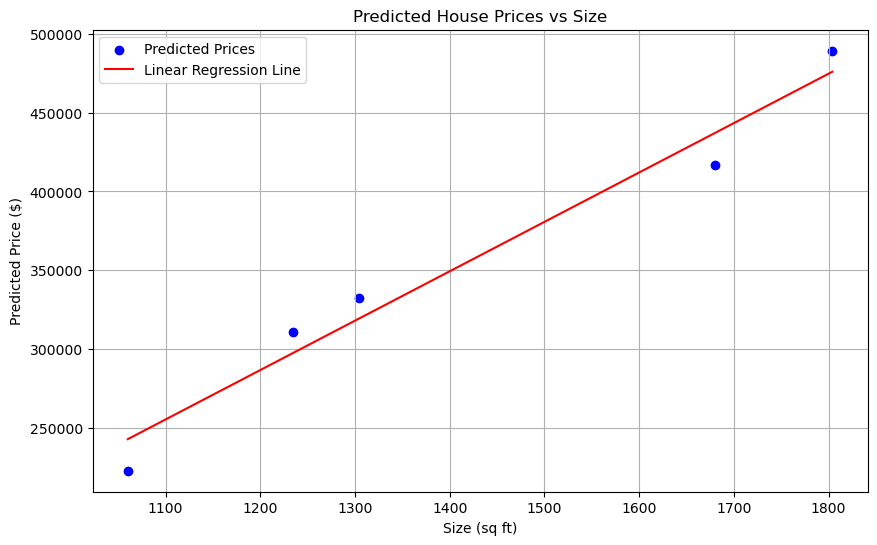

In [25]:
plt.figure(figsize=(10, 6))

# Scatter plot of size vs predicted prices
plt.scatter(results['Size'], results['Predicted Price ($)'], color='blue', label='Predicted Prices')
# Create a range of house sizes to plot the regression line
size_range = np.linspace(min(random_sizes), max(random_sizes), 100)

# Generate predictions for the size range using the model (assuming the average number of bedrooms)
bedrooms_avg = np.mean(random_bedrooms)
size_range_predictions = model.predict(np.column_stack([size_range, np.full_like(size_range, bedrooms_avg)]))

# Plot the regression line (linear line)
plt.plot(size_range, size_range_predictions, color='red', label='Linear Regression Line')
# Adding labels and title
plt.xlabel('Size (sq ft)')
plt.ylabel('Predicted Price ($)')
plt.title('Predicted House Prices vs Size')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()